In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit 

In [5]:
# euler maryuma for simulating a brownian gyrator
@njit
def brownian_gyrator(k, alpha, T, eta, ini, dt, nsteps):
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    kx = k[0]
    ky = k[1]
    x[0] = ini[0]
    y[0] = ini[1]
    eta_x = eta[0]
    eta_y = eta[1]
    Tx = T[0]
    Ty = T[1]
    for i in range(1, nsteps):
        x[i] = x[i-1] + dt*(-1/eta_x)*(kx*(np.cos(alpha)*x[i-1] + ky*np.sin(alpha)*y[i-1])*np.cos(alpha) - ky*(np.cos(alpha)*y[i-1] - np.sin(alpha)*x[i-1])*np.sin(alpha)) + np.sqrt(2*Tx/eta_x)*np.random.normal(0, dt)
        y[i] = y[i-1] + dt*(-1/eta_y)*(-kx*(np.cos(alpha)*x[i-1] + ky*np.sin(alpha)*y[i-1])*np.sin(alpha) + ky*(np.cos(alpha)*y[i-1] - np.sin(alpha)*x[i-1])*np.cos(alpha)) + np.sqrt(2*Ty/eta_y)*np.random.normal(0, dt)
    
    return x, y

In [34]:
ini = [1.0, 0.0]
k = [1.0, 2.0]
T = [0.01, 5.0]
# T = [0,0]
eta = [1.0, 5.0]
alpha = np.pi/4
dt = 0.01
nsteps = 10000
x, y = brownian_gyrator(k, alpha, T, eta, ini, dt, nsteps)

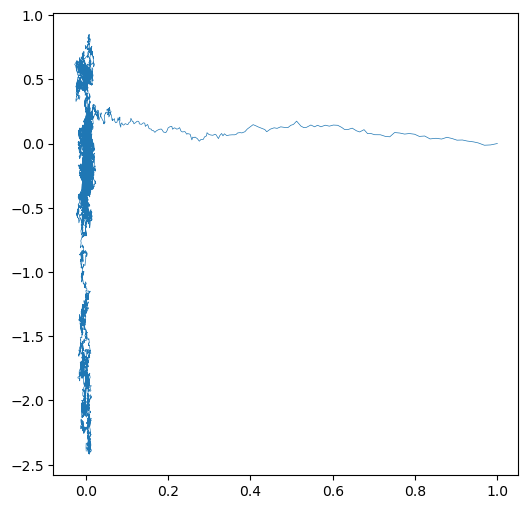

In [35]:
plt.figure(figsize=(6,6))
plt.plot(x, y, lw=0.5)